In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [28]:
dataset = pd.read_csv('data/tmdb_5000_movies.csv')
dataset.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [12]:
def nan_value_count(dataset):
    """[Nan value count]

    Args:
        dataset ([DataFrame]): [데이터 프레임 내의 nan 값을 표시합니다.]
    """
    dataset.isna().sum().plot(kind='bar')
    plt.grid(axis='y', alpha = .5)
    plt.title('Nan value summation of dataset')
    plt.show()

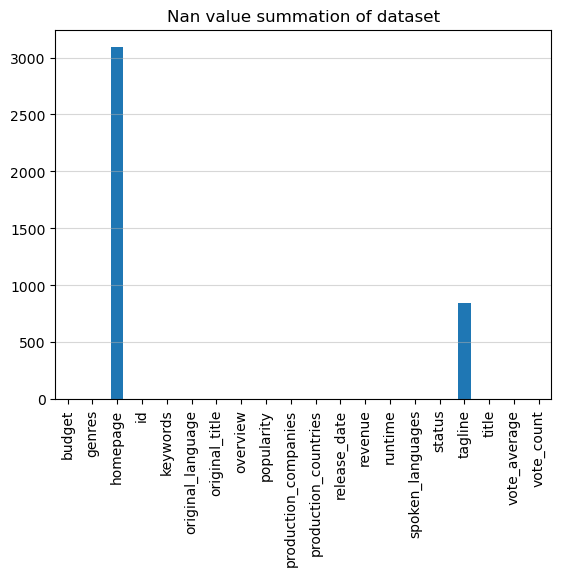

In [13]:
nan_value_count(dataset)

In [105]:
# test
# from ast import literal_eval

# dataset['genres'] = dataset['genres'].apply(literal_eval)
# dataset['genres'] = dataset['genres'].apply(lambda x : [y['name'] for y in x])

# dataset['genres_literal'] = dataset['genres'].apply(lambda x : (' ').join(x))


# col_list = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']

# for i in col_list:
#     globals()['{}_metrics'.format(i)] = 1



# from sklearn.feature_extraction.text import CountVectorizer

# count_vec = CountVectorizer(min_df = 0, ngram_range = (1,2))
# genres_metrics = count_vec.fit_transform(dataset['genres_literal'])


# from sklearn.metrics.pairwise import cosine_similarity

# genres_sim = cosine_similarity(genres_metrics, genres_metrics)

In [71]:
dataset = pd.read_csv('data/tmdb_5000_movies.csv')


In [72]:
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_vec = CountVectorizer(min_df = 0, ngram_range = (1,2))
col_list = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']

for i in tqdm(col_list):
    dataset[i] = dataset[i].apply(literal_eval)
    dataset[i] = dataset[i].apply(lambda x : [y['name'] for y in x])
    dataset['{}_literal'.format(i)] = dataset[i].apply(lambda x : (' ').join(x))
    globals()['{}_metrics'.format(i)] = count_vec.fit_transform(dataset['{}_literal'.format(i)])
    globals()['{}_sim'.format(i)] = cosine_similarity(globals()['{}_metrics'.format(i)], globals()['{}_metrics'.format(i)])
    globals()['{}_sim_sorted'.format(i)] = globals()['{}_sim'.format(i)].argsort()[:,::-1]

100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


In [42]:
dataset.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_literal,keywords_literal,production_companies_literal,production_countries_literal,spoken_languages_literal
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Ingenious Film Partners Twentieth Century Fox ...,United States of America United Kingdom,English Español
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Walt Disney Pictures Jerry Bruckheimer Films S...,United States of America,English


In [50]:
a = (genres_sim[1]==1).tolist()

In [85]:
genres_sim[0][0] == genres_sim[0][1296]

False

In [44]:
dataset['genres_literal'][262]

'Adventure Fantasy Action'

In [37]:
dataset['genres_literal'][1]

'Adventure Fantasy Action'

In [38]:
dataset['genres_literal'][129]

'Adventure Fantasy Action'

In [24]:
dataset.loc[dataset['genres_literal']=='Adventure Fantasy Action']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_literal,keywords_literal,production_companies_literal,production_countries_literal,spoken_languages_literal
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Walt Disney Pictures Jerry Bruckheimer Films S...,United States of America,English
12,200000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,58,"[witch, fortune teller, bondage, exotic island...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,Adventure Fantasy Action,witch fortune teller bondage exotic island mon...,Walt Disney Pictures Jerry Bruckheimer Films S...,Jamaica United States of America Bahamas Dominica,English Türkçe ελληνικά 普通话
98,250000000,"[Adventure, Fantasy, Action]",http://www.thehobbit.com/,49051,"[riddle, elves, dwarves, orcs, middle-earth (t...",en,The Hobbit: An Unexpected Journey,"Bilbo Baggins, a hobbit enjoying his quiet lif...",108.849621,"[WingNut Films, New Line Cinema, Warner Bros. ...",...,Released,From the smallest beginnings come the greatest...,The Hobbit: An Unexpected Journey,7.0,8297,Adventure Fantasy Action,riddle elves dwarves orcs middle-earth (tolkie...,WingNut Films New Line Cinema Warner Bros. Pic...,New Zealand United States of America,English
129,150000000,"[Adventure, Fantasy, Action]",http://thor.marvel.com/,10195,"[new mexico, banishment, shield, marvel comic,...",en,Thor,"Against his father Odin's will, The Mighty Tho...",86.493424,[Marvel Studios],...,Released,Two worlds. One hero.,Thor,6.6,6525,Adventure Fantasy Action,new mexico banishment shield marvel comic hamm...,Marvel Studios,United States of America,English
199,140000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneyvideos/liveaction/p...,22,"[exotic island, blacksmith, east india trading...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[Walt Disney Pictures, Jerry Bruckheimer Films]",...,Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,Adventure Fantasy Action,exotic island blacksmith east india trading co...,Walt Disney Pictures Jerry Bruckheimer Films,United States of America,English
206,125000000,"[Adventure, Fantasy, Action]",http://www.clash-of-the-titans.com/,18823,"[hades, mythology, greek mythology, zeus, medu...",en,Clash of the Titans,"Born of a god but raised as a man, Perseus is ...",47.686442,"[The Zanuck Company, Legendary Pictures, Thund...",...,Released,Titans will clash.,Clash of the Titans,5.6,2233,Adventure Fantasy Action,hades mythology greek mythology zeus medusa my...,The Zanuck Company Legendary Pictures Thunder ...,United States of America,English
208,160000000,"[Adventure, Fantasy, Action]",NaN,1911,"[witch, cave, arabian, scandinavia, bagdad, vi...",en,The 13th Warrior,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",27.220157,[Touchstone Pictures],...,Released,Prey for the living.,The 13th Warrior,6.4,510,Adventure Fantasy Action,witch cave arabian scandinavia bagdad viking i...,Touchstone Pictures,United States of America,English Norsk
262,93000000,"[Adventure, Fantasy, Action]",http://www.lordoftherings.net/,120,"[elves, dwarves, orcs, middle-earth (tolkien),...",en,The Lord of the

In [213]:
def find_sim_movie(dataset, genres_sim_sorted, title_name, top = 10):
    title_movie = dataset[dataset['title'] == title_name]
    
    title_indexes = title_movie.index.values
    sim_indexes = genres_sim_sorted[title_indexes, :top+1]
    print(sim_indexes[0][1:])
    sim_indexes = sim_indexes[0][1:].reshape(-1)
    
    return dataset.iloc[sim_indexes]

In [215]:
top_rank = 5
# recommend_movie = 
find_sim_movie(dataset, genres_sim_sorted, "Thor", top_rank)
# recommend_movie[['original_title', 'vote_average']]


# list_movie = list(recommend_movie['original_title'][1:top_rank])


[[262   1 129 199 206 208]]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_literal,keywords_literal,production_companies_literal,production_countries_literal,spoken_languages_literal
262,93000000,"[Adventure, Fantasy, Action]",http://www.lordoftherings.net/,120,"[elves, dwarves, orcs, middle-earth (tolkien),...",en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",138.049577,"[WingNut Films, New Line Cinema, The Saul Zaen...",...,Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,8.0,8705,Adventure Fantasy Action,elves dwarves orcs middle-earth (tolkien) hobb...,WingNut Films New Line Cinema The Saul Zaentz ...,New Zealand United States of America,English
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Walt Disney Pictures Jerry Bruckheimer Films S...,United States of America,English
129,150000000,"[Adventure, Fantasy, Action]",http://thor.marvel.com/,10195,"[new mexico, banishment, shield, marvel comic,...",en,Thor,"Against his father Odin's will, The Mighty Tho...",86.493424,[Marvel Studios],...,Released,Two worlds. One hero.,Thor,6.6,6525,Adventure Fantasy Action,new mexico banishment shield marvel comic hamm...,Marvel Studios,United States of America,English
199,140000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneyvideos/liveaction/p...,22,"[exotic island, blacksmith, east india trading...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[Walt Disney Pictures, Jerry Bruckheimer Films]",...,Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,Adventure Fantasy Action,exotic island blacksmith east india trading co...,Walt Disney Pictures Jerry Bruckheimer Films,United States of America,English
206,125000000,"[Adventure, Fantasy, Action]",http://www.clash-of-the-titans.com/,18823,"[hades, mythology, greek mythology, zeus, medu...",en,Clash of the Titans,"Born of a god but raised as a man, Perseus is ...",47.686442,"[The Zanuck Company, Legendary Pictures, Thund...",...,Released,Titans will clash.,Clash of the Titans,5.6,2233,Adventure Fantasy Action,hades mythology greek mythology zeus medusa my...,The Zanuck Company Legendary Pictures Thunder ...,United States of America,English
208,160000000,"[Adventure, Fantasy, Action]",NaN,1911,"[witch, cave, arabian, scandinavia, bagdad, vi...",en,The 13th Warrior,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",27.220157,[Touchstone Pictures],...,Released,Prey for the living.,The 13th Warrior,6.4,510,Adventure Fantasy Action,witch cave arabian scandinavia bagdad viking i...,Touchstone Pictures,United States of America,English Norsk


In [165]:
title_indexes = title_movie.index.values